# Support Vector Machine dengan data Visit-Nominal.csv

### 1. Inisialisasikan library yang diperlukan untuk dataset ini.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score


### 2. Masukan dataset Visit-Nominal.csv kedalam dataframe

In [2]:
df = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True)
attrs = []
for attr in range(7):
    attrs.append(df.at[0,attr])

dfnew = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True, skiprows = 1)
dfnew.columns = attrs

dfnew.head()

,Home,Browsed,Searched,Prod_A,Prod_B,Prod_C,Visit_Again
0,yes,no,no,no,no,no,no
1,yes,yes,yes,no,no,no,no
2,yes,no,no,no,no,no,no
3,yes,yes,yes,yes,no,no,yes
4,yes,no,yes,yes,yes,no,yes


In [3]:
print(dfnew.describe())

       Home Browsed Searched Prod_A Prod_B Prod_C Visit_Again
count   100     100      100    100    100    100         100
unique    2       2        2      2      2      2           2
top     yes     yes       no    yes    yes     no          no
freq     60      72       57     53     55     55          61



### 3. Representasikan data 'yes' dan 'no' kedalam bentuk biner '1' dan '0'

In [4]:
toBinary = lambda x: 1 if x=="yes" else 0
dfnew = dfnew.applymap(toBinary)

 
### 4. Cek apakah terdapat value fitur yang kosong

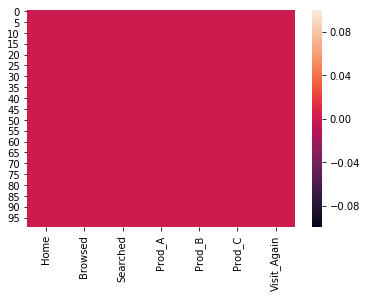

In [5]:
missing_values = dfnew.isnull()
missing_values

sns.heatmap(data = missing_values)


### 5. Lihat perbandingan jumlah class 0 dan 1

0    61
1    39
Name: Visit_Again, dtype: int64

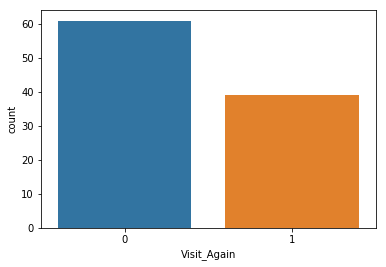

In [6]:
sns.countplot(x='Visit_Again', data=dfnew)
dfnew.Visit_Again.value_counts()


### 6. Siapkan data untuk training secara biasa dan training dengan cross validation

In [7]:
feature = attrs
feature.pop()
feature

['Home', 'Browsed', 'Searched', 'Prod_A', 'Prod_B', 'Prod_C']

In [8]:
features = dfnew[feature]
label = dfnew['Visit_Again']


### 7. Inisialisasi 12 model

In [9]:
#RBF C = 0.01
rbfmodel1 = svm.SVC(gamma='scale', C=0.01, kernel='rbf')
#RBF C = 0.1
rbfmodel2 = svm.SVC(gamma='scale', C=0.1, kernel='rbf')
#RBF C = 1
rbfmodel3 = svm.SVC(gamma='scale', C=1, kernel='rbf')
#RBF C = 10
rbfmodel4 = svm.SVC(gamma='scale', C=10, kernel='rbf')

#SIGMOID C = 0.01
sigmoidmodel1 = svm.SVC(gamma='scale', C=0.01, kernel='sigmoid')
#SIGMOID C = 0.1
sigmoidmodel2 = svm.SVC(gamma='scale', C=0.1, kernel='sigmoid')
#SIGMOID C = 1
sigmoidmodel3 = svm.SVC(gamma='scale', C=1, kernel='sigmoid')
#SIGMOID C = 10
sigmoidmodel4 = svm.SVC(gamma='scale', C=10, kernel='sigmoid')

#LINEAR C = 0.01
linearmodel1 = svm.SVC(gamma='scale', C=0.01, kernel='linear')
#LINEAR C = 0.1
linearmodel2 = svm.SVC(gamma='scale', C=0.1, kernel='linear')
#LINEAR C = 1
linearmodel3 = svm.SVC(gamma='scale', C=1, kernel='linear')
#LINEAR C = 10
linearmodel4 = svm.SVC(gamma='scale', C=10, kernel='linear')


### 7.1 RBF Model

CROSS VALIDATION SCORE RBF C=0.01 :  0.610125313283208


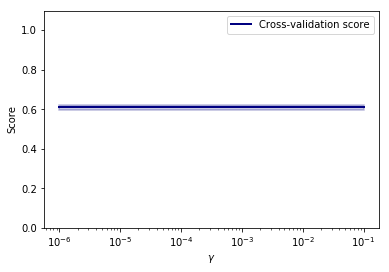

In [10]:
RBFscore1 =  cross_val_score(rbfmodel1, features, label, cv=5)
print("CROSS VALIDATION SCORE RBF C=0.01 : ",statistics.mean(RBFscore1))

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    rbfmodel1, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE RBF C=0.1 :  0.610125313283208


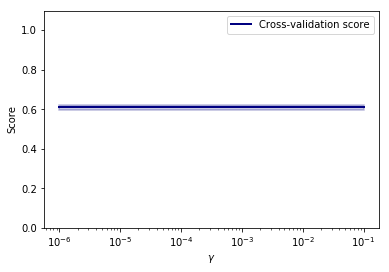

In [11]:
RBFscore2 =  cross_val_score(rbfmodel2, features, label, cv=5)
print("CROSS VALIDATION SCORE RBF C=0.1 : ",statistics.mean(RBFscore2))

train_scores, test_scores = validation_curve(
    rbfmodel2, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE RBF C=1 :  0.5095989974937344


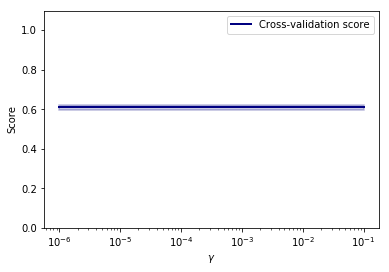

In [12]:
RBFscore3 =  cross_val_score(rbfmodel3, features, label, cv=5)
print("CROSS VALIDATION SCORE RBF C=1 : ",statistics.mean(RBFscore3))

train_scores, test_scores = validation_curve(
    rbfmodel3, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


CROSS VALIDATION SCORE RBF C=10 :  0.610125313283208


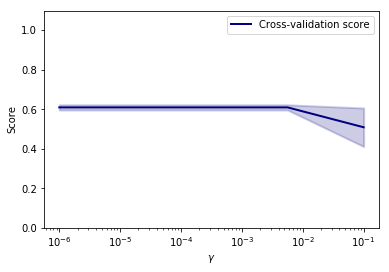

In [13]:

RBFscore4 =  cross_val_score(rbfmodel2, features, label, cv=5)
print("CROSS VALIDATION SCORE RBF C=10 : ",statistics.mean(RBFscore4))

train_scores, test_scores = validation_curve(
    rbfmodel4, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



### 7.2 SIGMOID Model

CROSS VALIDATION SCORE SIGMOID C=0.01 :  0.610125313283208


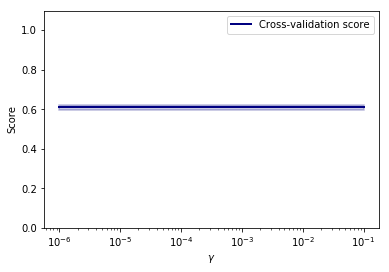

In [14]:
sigmoidscore1 =  cross_val_score(sigmoidmodel1, features, label, cv=5)
print("CROSS VALIDATION SCORE SIGMOID C=0.01 : ",statistics.mean(sigmoidscore1))

train_scores, test_scores = validation_curve(
    sigmoidmodel1, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE SIGMOID C=0.1 :  0.610125313283208


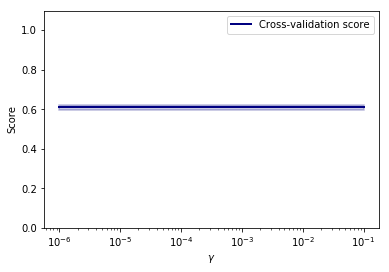

In [15]:
sigmoidscore2 =  cross_val_score(sigmoidmodel2, features, label, cv=5)
print("CROSS VALIDATION SCORE SIGMOID C=0.1 : ",statistics.mean(sigmoidscore2))

train_scores, test_scores = validation_curve(
    sigmoidmodel2, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE SIGMOID C=1 :  0.640125313283208


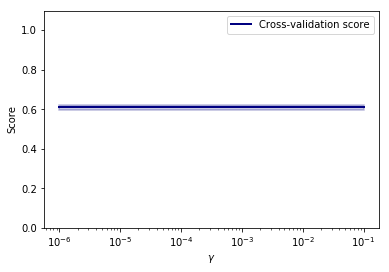

In [16]:
sigmoidscore3 =  cross_val_score(sigmoidmodel3, features, label, cv=5)
print("CROSS VALIDATION SCORE SIGMOID C=1 : ",statistics.mean(sigmoidscore3))

train_scores, test_scores = validation_curve(
    sigmoidmodel3, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE SIGMOID C=10 :  0.46849624060150374


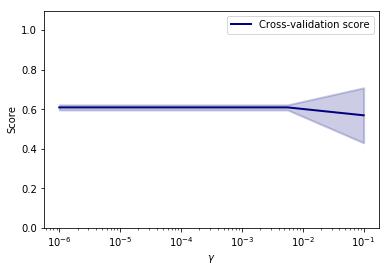

In [17]:
sigmoidscore4 =  cross_val_score(sigmoidmodel4, features, label, cv=5)
print("CROSS VALIDATION SCORE SIGMOID C=10 : ",statistics.mean(sigmoidscore4))

train_scores, test_scores = validation_curve(
    sigmoidmodel4, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


### 7.3 LINEAR Model

CROSS VALIDATION SCORE LINEAR C=0.01 :  0.610125313283208


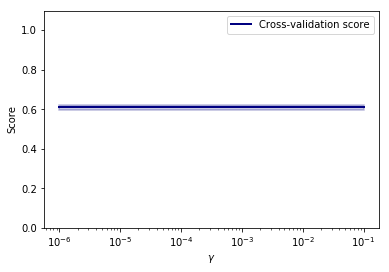

In [18]:
linearscore1 =  cross_val_score(sigmoidmodel1, features, label, cv=5)
print("CROSS VALIDATION SCORE LINEAR C=0.01 : ",statistics.mean(linearscore1))


train_scores, test_scores = validation_curve(
    linearmodel1, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE LINEAR C=0.1 :  0.610125313283208


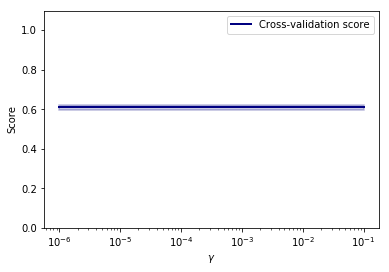

In [19]:
linearscore2 =  cross_val_score(sigmoidmodel2, features, label, cv=5)
print("CROSS VALIDATION SCORE LINEAR C=0.1 : ",statistics.mean(linearscore2))

train_scores, test_scores = validation_curve(
    linearmodel2, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE LINEAR C=1 :  0.610125313283208


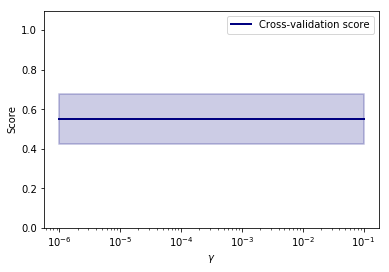

In [20]:
linearscore3 =  cross_val_score(sigmoidmodel1, features, label, cv=5)
print("CROSS VALIDATION SCORE LINEAR C=1 : ",statistics.mean(linearscore3))

train_scores, test_scores = validation_curve(
    linearmodel3, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

CROSS VALIDATION SCORE LINEAR C=10 :  0.46849624060150374


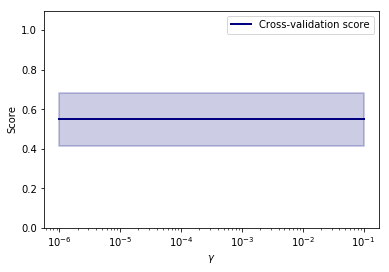

In [21]:
linearscore4 =  cross_val_score(sigmoidmodel4, features, label, cv=5)
print("CROSS VALIDATION SCORE LINEAR C=10 : ",statistics.mean(linearscore4))

train_scores, test_scores = validation_curve(
    linearmodel4, features, label, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()